# 6.4 Regression Analysis

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### 5. Final Observations

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
path = r'/Users/a/Career Foundry/Achievement 6/02 Data/02 Prepared Data'

In [3]:
path

'/Users/a/Career Foundry/Achievement 6/02 Data/02 Prepared Data'

In [4]:
# Importing dataset
df = pd.read_csv(os.path.join(path, 'df_cleaned.csv'), index_col = False)

### 2. Data cleaning

In [5]:
df.columns

Index(['Unnamed: 0', 'Region', 'Country', 'City', 'Month', 'Day', 'Year',
       'AvgTemperature'],
      dtype='object')

In [6]:
df.shape

(2906327, 8)

In [8]:
df.head()

,Unnamed: 0,Region,Country,City,Month,Day,Year,AvgTemperature
0,0,Africa,Algeria,Algiers,1,1,1995,64.2
1,1,Africa,Algeria,Algiers,1,2,1995,49.4
2,2,Africa,Algeria,Algiers,1,3,1995,48.8
3,3,Africa,Algeria,Algiers,1,4,1995,46.4
4,4,Africa,Algeria,Algiers,1,5,1995,47.9


The dataset has already been cleaned in the previous Exercises

### 3. Data prep for regression analysis 

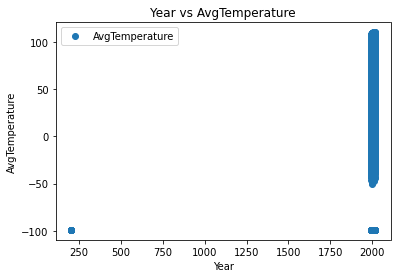

In [10]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Year', y='AvgTemperature',style='o') 
plt.title('Year vs AvgTemperature')  
plt.xlabel('Year')  
plt.ylabel('AvgTemperature')  
plt.show()

Hypothesis: When the variable 'years' increases, the average temperature increases

In [11]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Year'].values.reshape(-1,1)
y = df['AvgTemperature'].values.reshape(-1,1)

In [13]:
X

array([[1995],
       [1995],
       [1995],
       ...,
       [2013],
       [2013],
       [2013]])

In [14]:
y

array([[64.2],
       [49.4],
       [48.8],
       ...,
       [84.2],
       [83.8],
       [83.6]])

In [15]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [16]:
# Create a regression object.

regression = LinearRegression() 

In [17]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [18]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

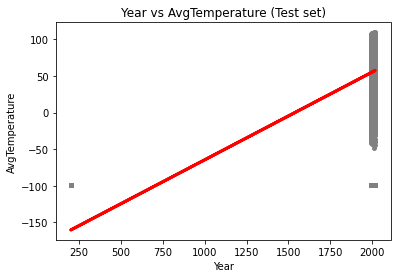

In [19]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Year vs AvgTemperature (Test set)')
plot_test.xlabel('Year')
plot_test.ylabel('AvgTemperature')
plot_test.show()

In [20]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [21]:
# Print the model summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.11969009]]
Mean squared error:  1025.3181200158963
R2 score:  0.0076011027367896


The slop is positive, meaning that when x increases so does the y variable which proves the initial hypothesis
The Mean squared error is very large indicating that the regression is not the best model for this data
The R2 Score indicated that the model is not a good fit either 
--> the Model is not performing well overall

In [22]:
y_predicted

array([[56.41812068],
       [55.10152969],
       [57.01657113],
       ...,
       [56.41812068],
       [55.34090987],
       [55.10152969]])

In [23]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,81.4,56.418121
1,79.0,55.101530
2,9.5,57.016571
3,67.5,55.460600
4,81.3,55.819670
5,64.8,56.537811
6,70.9,55.340910
7,84.3,55.699980
8,34.2,54.862150
9,82.9,56.298431


There is a big difference between the actual values and the predicted values. This indicates that the model is inaccurate

##### Compare how the regression fits the training set

In [24]:
# Predict.

y_predicted_train = regression.predict(X_train) 

In [25]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [26]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.11969009]]
Mean squared error:  1023.5356029623283
R2 score:  0.0076158052362599316


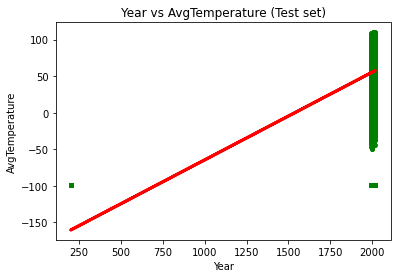

In [27]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Year vs AvgTemperature (Test set)')
plot_test.xlabel('Year')
plot_test.ylabel('AvgTemperature')
plot_test.show()

#### 5. Final Observations

The Analysis has proved that the model is inaccurate and not fit for this data: The slop is positive, meaning that when x increases so does the y variable which proves the initial hypothesis. However, the large Mean squared error and the R2 Score indicate that the model is not a good fit. Also, there is a big difference between the actual values and the predicted values. 
Depending on how the data was collected, there could be some data bias caused by human error or a malfunction in the machines.